 - Up to this point: All mvp code done, just need to clean up build_mlp to parameterize network topography

### May 16

 - build_mlp properly supports topography parameterization now
 - ran the experiments for cartpole; documente in next code block
 
b527f8d275efc4e2cf334902529262af13e2374b

In [ ]:
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -dna --exp_name sb_no_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg -dna --exp_name sb_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg --exp_name sb_rtg_na --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -dna --exp_name lb_no_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg -dna --exp_name lb_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg --exp_name lb_rtg_na --n_layers 1 --size 32

#### Large Batch Experiments
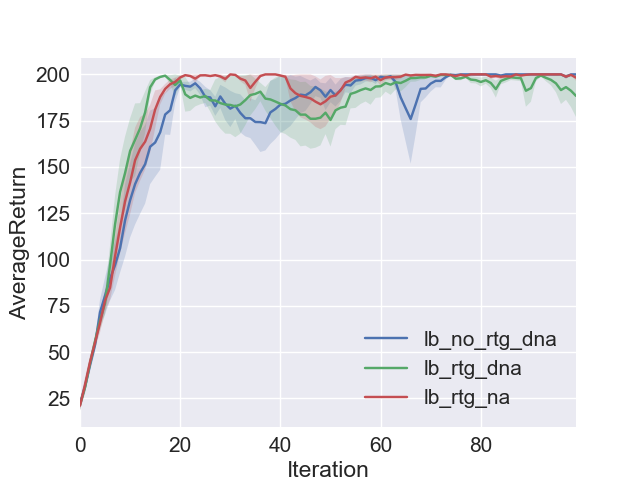
```
lb_no_rtg_dna_CartPole-v0_16-05-2018_18-45-19
lb_rtg_dna_CartPole-v0_16-05-2018_18-55-35
lb_rtg_na_CartPole-v0_16-05-2018_19-05-04
```

#### Small Batch Experiments
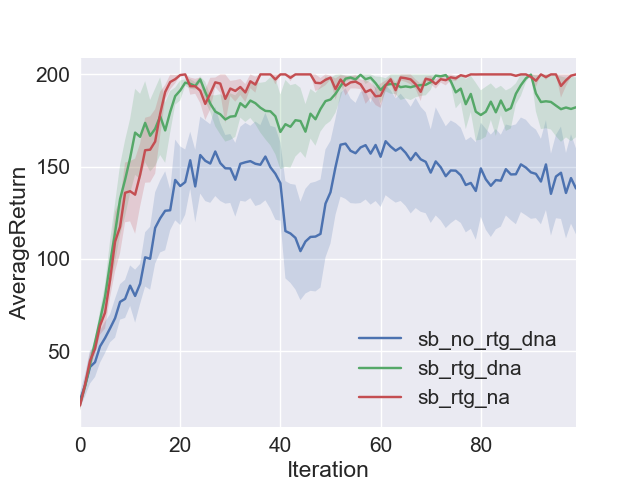

```
sb_no_rtg_dna_CartPole-v0_16-05-2018_18-38-35
sb_rtg_dna_CartPole-v0_16-05-2018_18-40-49
sb_rtg_na_CartPole-v0_16-05-2018_18-43-02
```

 - In both small and large batches, the order of performance is:
     1. Reward to go + Normalize advantage
     2. Reward to go
     3. Neither
     
 - Large batch allows (2) and (3) to get closer to (1)'s performance as (1) is saturated by CartPole's successful exit of return = 200.
 
 - What exactly are the pros of advantage normalization?
     1. Subtracts advantage by constant baseline (avg of advantages)
         - This is good, but could be better as noted in lectures to further minimize variance. Can be derived through the definition of variance
     2. Rescales learning rate by 1/$\sigma$
         - It's not clear how this helps? Learning rate slows when stdev of return is high? Shouldn't we try to make the learning rate bigger when stdev is high, as that denotes a lack of convergence?

# Experiment 2: Scale advantage (learning rate) with $\sigma$ instead of $1/\sigma$

In [ ]:
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -dna --exp_name sb_no_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg -dna --exp_name sb_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg --exp_name sb_rtg_na_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -dna --exp_name lb_no_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg -dna --exp_name lb_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg --exp_name lb_rtg_na_scale_std --n_layers 1 --size 32

954e098ae05b9df68d3009f43b83fecefedc2a10

#### Large Batch Experiments
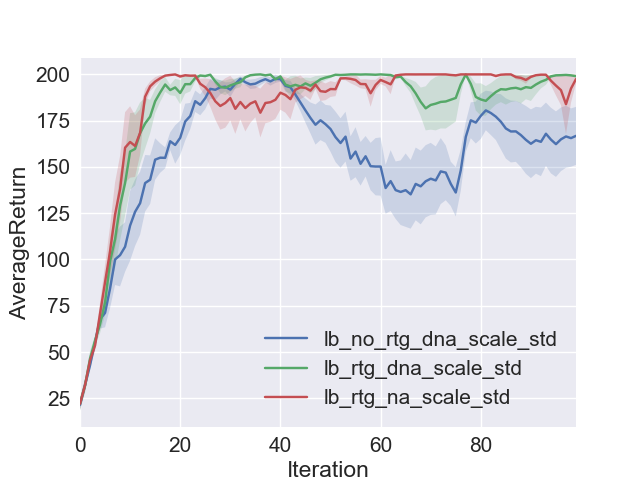
lb_no_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-43-16
lb_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-53-23
lb_rtg_na_scale_std_CartPole-v0_17-05-2018_17-03-34


#### Small Batch Experiments
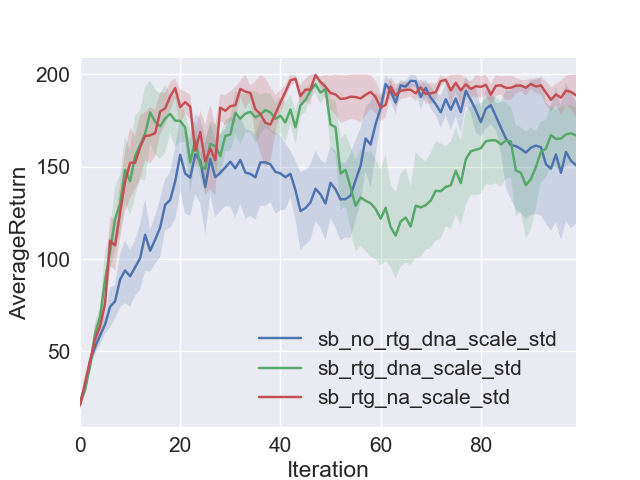
sb_no_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-36-45
sb_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-38-51
sb_rtg_na_scale_std_CartPole-v0_17-05-2018_16-40-56

 - It looks like multiplying by $\sigma$ instead of dividing makes the performance worse. Digging in further, I guess the normalization is just to standardize the returns s.t. the gradients are not affected crazy return values. Karpathy's explaination:
> More general advantage functions. I also promised a bit more discussion of the returns. So far we have judged the goodness of every individual action based on whether or not we win the game. In a more general RL setting we would receive some reward rt at every time step. One common choice is to use a discounted reward, so the “eventual reward” in the diagram above would become Rt=∑∞k=0γkrt+k, where γ is a number between 0 and 1 called a discount factor (e.g. 0.99). The expression states that the strength with which we encourage a sampled action is the weighted sum of all rewards afterwards, but later rewards are exponentially less important. In practice it can can also be important to normalize these. For example, suppose we compute Rt for all of the 20,000 actions in the batch of 100 Pong game rollouts above. One good idea is to “standardize” these returns (e.g. subtract mean, divide by standard deviation) before we plug them into backprop. This way we’re always encouraging and discouraging roughly half of the performed actions. Mathematically you can also interpret these tricks as a way of controlling the variance of the policy gradient estimator. A more in-depth exploration can be found here.
>
> https://datascience.stackexchange.com/questions/20098/why-do-we-normalize-the-discounted-rewards-when-doing-policy-gradient-reinforcem



# Answers to section 4.2.1

1. Reward-to-go was much better than trajectory based gradient estimator
2. Advantage normalization made the network converge faster
3. Testing advantage normalization and why it works explained above
4. Batch size helped mostly for the "no reward-to-go" experiment, but it made iterations much slower. Effects not really seen on the experiments with "reward-to-go"

## 4-2-2_experiments.sh

 - Looking for effect of network size
 
```
rtg_na_l1_32_InvertedPendulum-v2_17-05-2018_19-06-14/
rtg_na_l1_64_InvertedPendulum-v2_17-05-2018_19-08-45/
rtg_na_l2_32_InvertedPendulum-v2_17-05-2018_19-11-15/
rtg_na_l2_64_InvertedPendulum-v2_17-05-2018_19-13-48/
rtg_na_l3_32_InvertedPendulum-v2_17-05-2018_19-16-18/
rtg_na_l3_64_InvertedPendulum-v2_17-05-2018_19-18-48/
```
 
 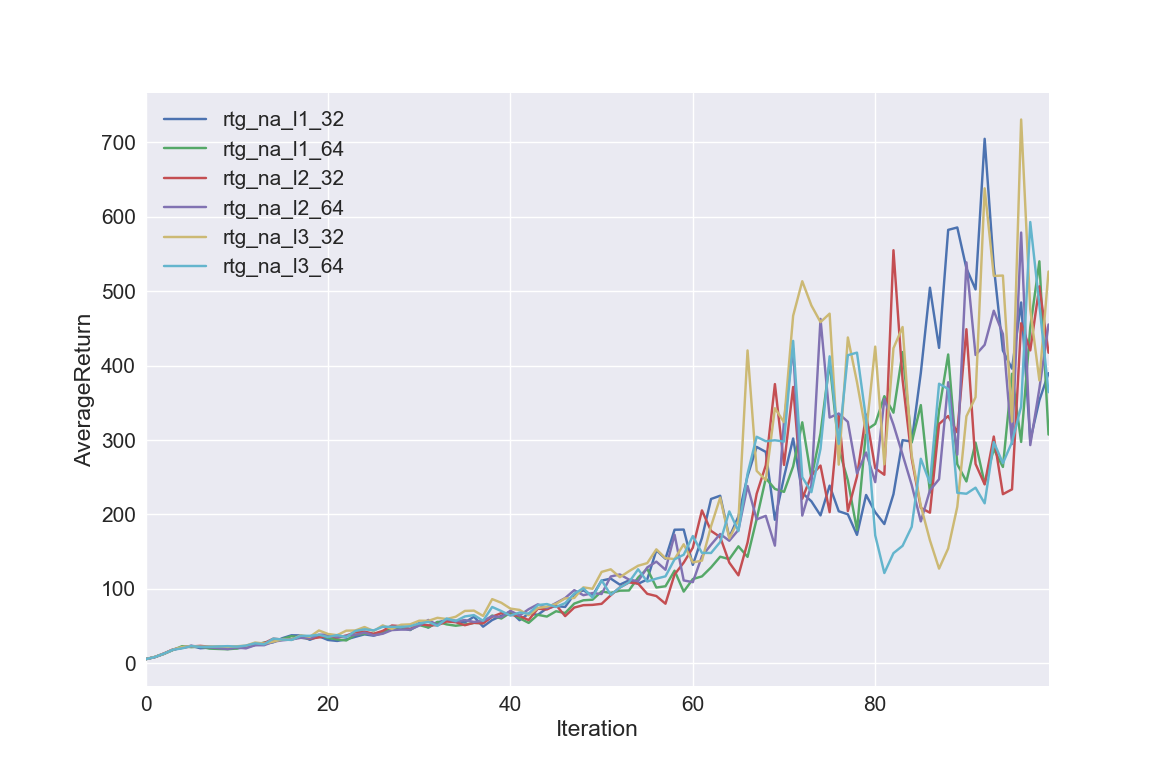
 
 - Doesn't seem like there is one

## 4-2-2_e2.sh

 - Look for effect in batch size: 1000, 5000, 10000
 
```
rtg_na_l1_32_1000_InvertedPendulum-v2_17-05-2018_19-25-33
rtg_na_l1_32_InvertedPendulum-v2_17-05-2018_19-06-14/    # 5000
rtg_na_l1_32_10000_InvertedPendulum-v2_17-05-2018_19-26-07
```

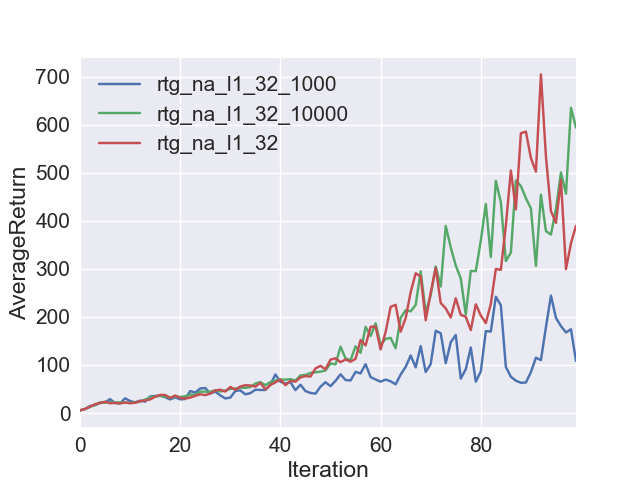

 - Doesn't look like there is an effect beyond 5000
 

4-2-2_e3

 - Check if ReLu activation can make the network solve the environment
 
```
data/rtg_na_l1_32_5000_relu_InvertedPendulum-v2_17-05-2018_19-37-12
data/rtg_na_l1_32_InvertedPendulum-v2_17-05-2018_19-06-14
```

 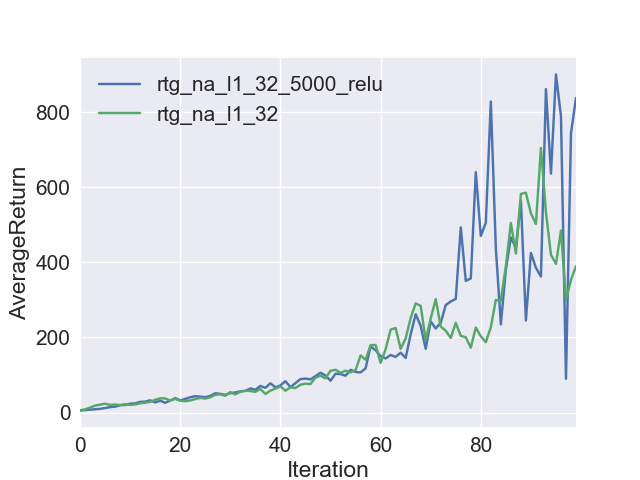
 
 - ReLu activation seems to do slightly better

## 4-2-2_e4

 - Try using discount factor at .99 and .95
    
```
rtg_na_l1_32_InvertedPendulum-v2_17-05-2018_19-06-14 
rtg_na_l1_32_5000_relu_d99_InvertedPendulum-v2_17-05-2018_19-44-18 
rtg_na_l1_32_5000_relu_d95_InvertedPendulum-v2_17-05-2018_19-46-56
```

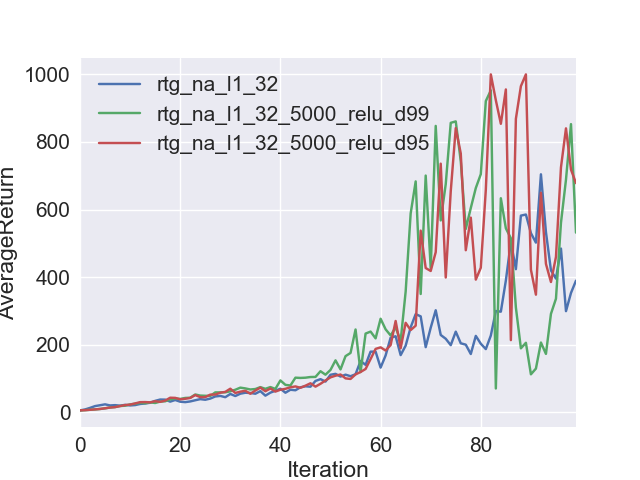

 - It looks like adding a discount factor allows for an great leap in average reward somewhere around iteration 65. However, once it reaches good performance there is still a high variance

## 4-2-2_e5

 - Try discount factor at .80 and .90 with an experiment count of 3 instead of 1
 
```
rtg_na_l1_32_InvertedPendulum-v2_17-05-2018_19-06-14 
rtg_na_l1_32_5000_relu_d99_InvertedPendulum-v2_17-05-2018_19-44-18 
rtg_na_l1_32_5000_relu_d95_InvertedPendulum-v2_17-05-2018_19-46-56 
rtg_na_l1_32_5000_relu_d90_InvertedPendulum-v2_17-05-2018_19-55-23 
rtg_na_l1_32_5000_relu_d80_InvertedPendulum-v2_17-05-2018_20-04-05
```

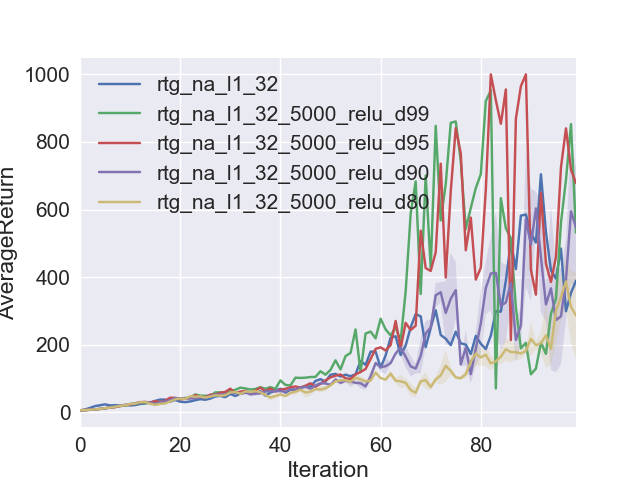

 - Lower discount doesn't seem to help. .95 is about the sweet spot?
 


## 4-2-2_e6

 - Try bumping up learning rate from 0.005 to 0.01 and 0.05. Discount factor at .99 because this is running in parallel with 4-2-2_e5
 
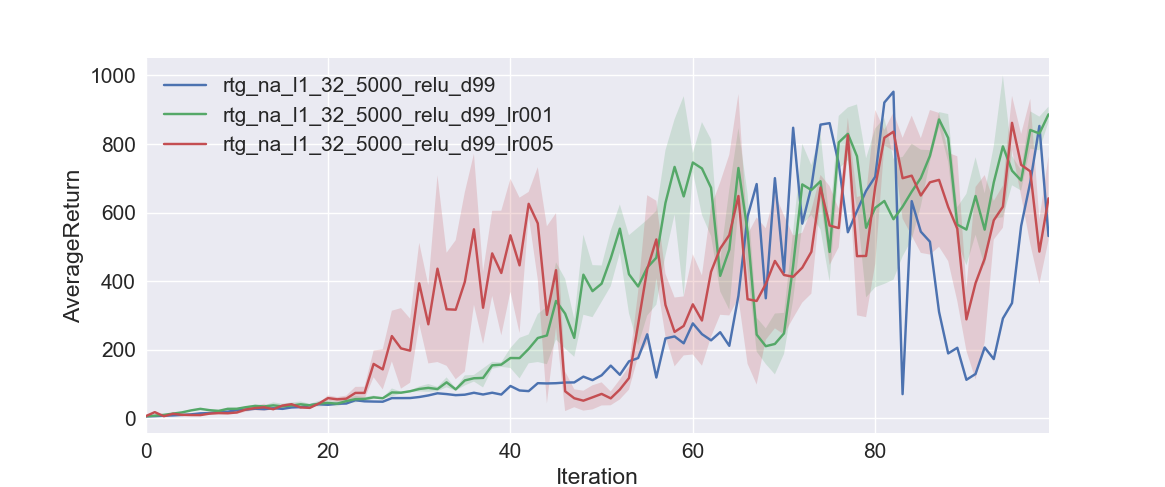

 - There is a distinct relationship between learning rate and where the hockey stick growth occurs. Maybe try increasing batch size to help reduce the variance once it performs well.

## 4-2-2_e7

- try increasing batch size to help reduce the variance once it performs well.

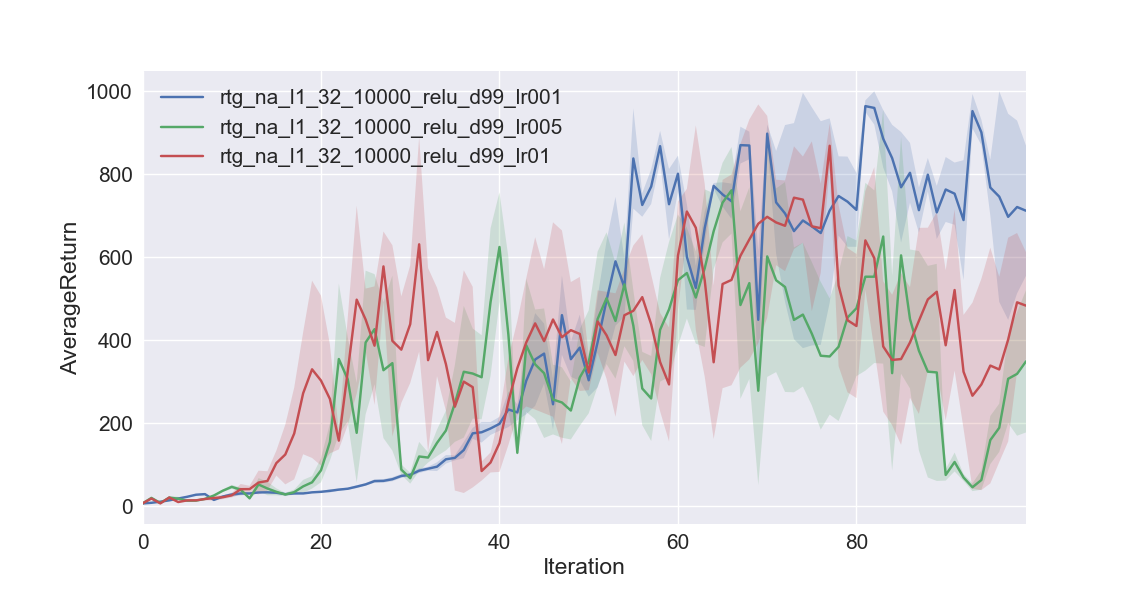

 - Batch size increase doesn't seem to have much of an effect

## 4-2-2_e8

 - Maybe my networks are too small, try running the a layer/neuron size experiment again with more trials, with only the 1 and 2 layer models to save exp. time.
 
```
rtg_na_l1_32_5000_relu_d99_lr001_InvertedPendulum-v2_18-05-2018_11-18-41 
rtg_na_l2_32_5000_relu_d99_lr001_InvertedPendulum-v2_18-05-2018_11-31-27 
rtg_na_l1_64_5000_relu_d99_lr001_InvertedPendulum-v2_18-05-2018_11-44-26 
rtg_na_l2_16_5000_relu_d99_lr001_InvertedPendulum-v2_18-05-2018_11-57-21
```

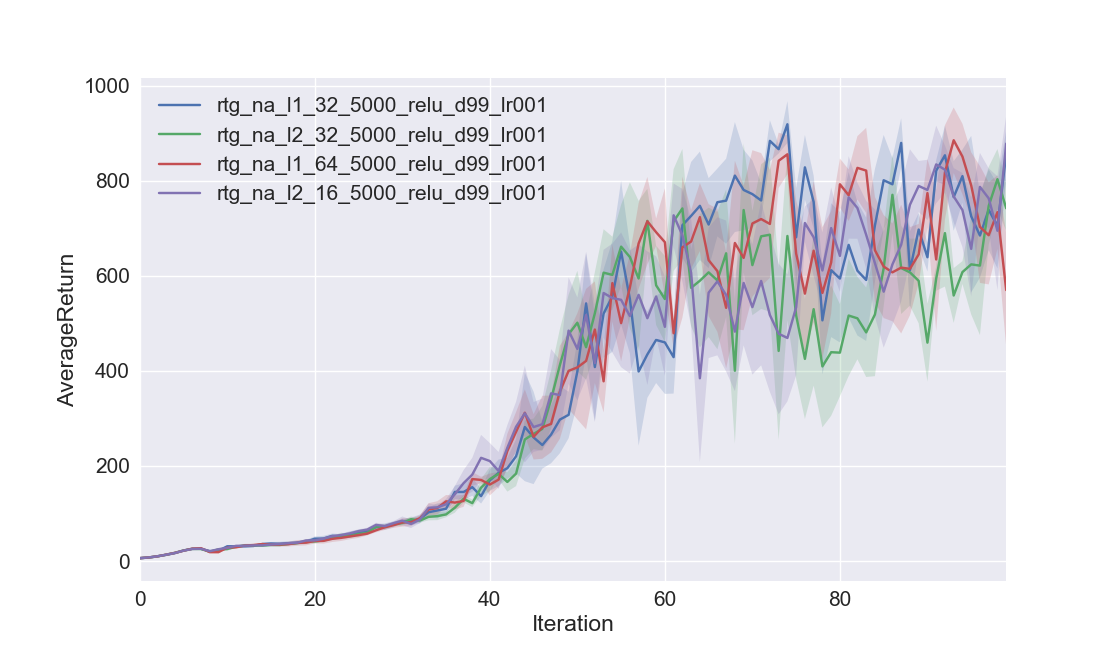

 - Doesn't seem to help at all, l1_32 performs just as well

## 4-2-2_e9

 - Try the parameters of a public github solution
 - If this doesn't work, I wonder if there is an implementation bug in my code. Or maybe inverted pendulum v2 is harder than v1?
 
```
rtg_na_l2_16_1000_relu_lr001_InvertedPendulum-v2_18-05-2018_14-22-08
```
 
 
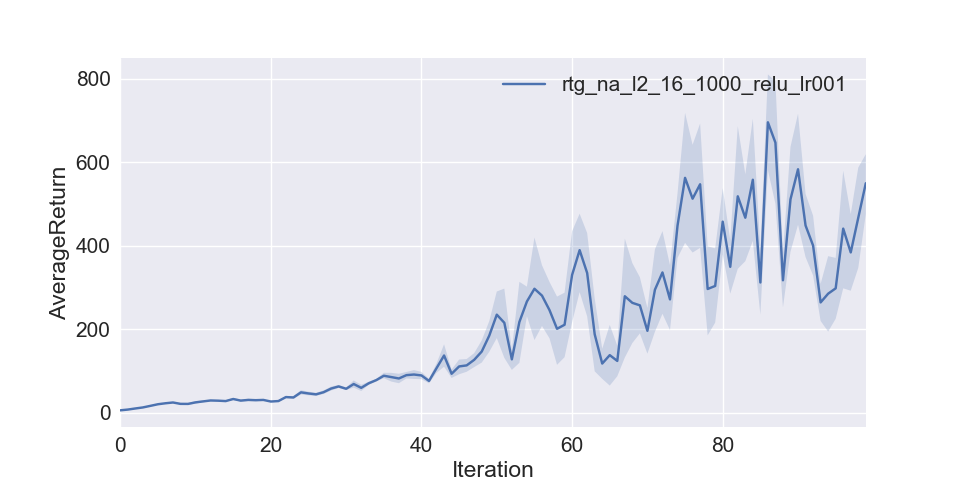
 - Found out the reason that the pervious experiments haven't really worked is because the network layers and size haven't been passed into build_mlp
 
 

## 4-2-2_e10

 - Re-try the first experiment

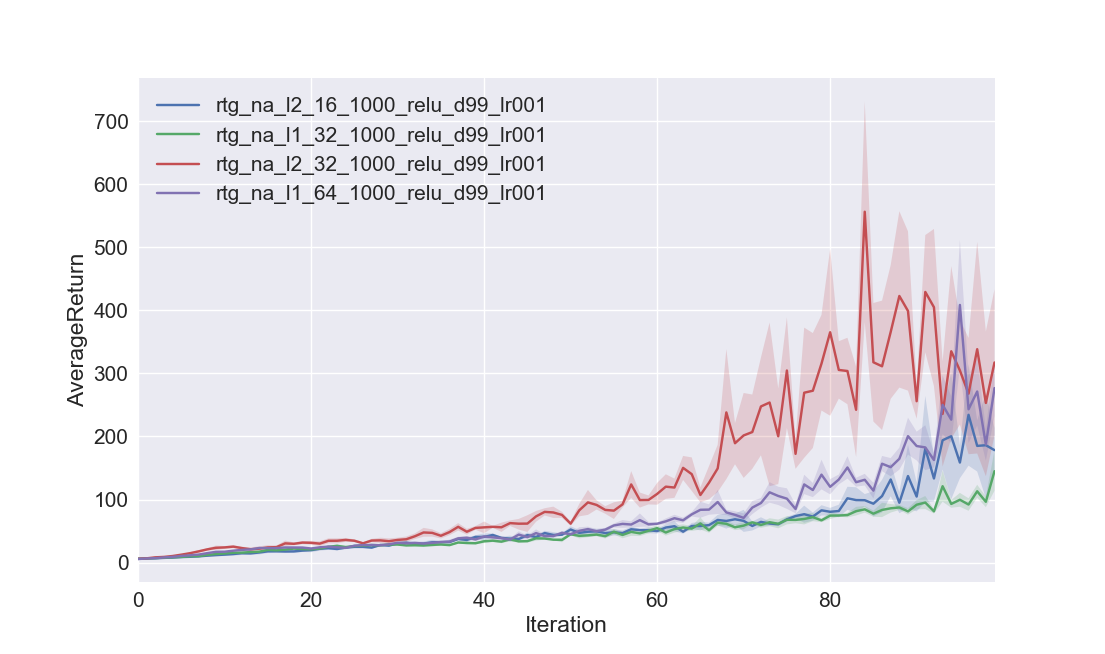

 - Next thing to try: set logstd to tf.Variable. logstd might be too small right now

## 4-2-2_e11

- Try set logstd to tf.get_variable instead of sampling from uniform

```
rtg_na_l2_32_1000_relu_d99_lr001_InvertedPendulum-v2_18-05-2018_18-55-37/1
```

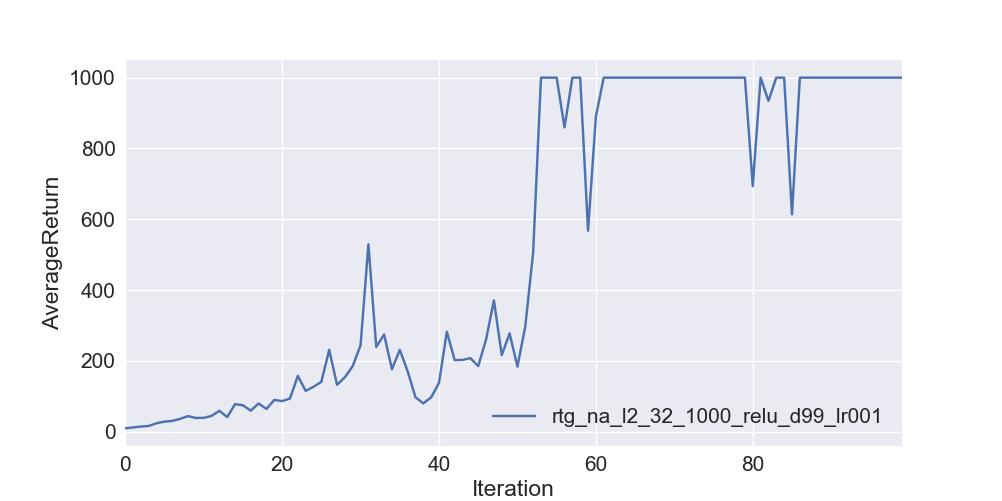

 - It worked very well for at least one run!

## May 18

 - Try to implement the parallelization before trying the cheetah task to shorten iteration and experiment time
 

```
$ time python train_pg.py CartPole-v0 -n 100 -b 1000 -e 1 -rtg -dna --exp_name sb_rtg_dna_scale_std --n_layers 1 --size 32

real	0m36.656s
user	0m30.695s
sys	0m5.999s
```

## May 19

 - Parallelization seems really difficult. Just move on for now.
 - Figured it out. 
     - Need to have a learner process + __N__ execution processes. 
     - Save weights and redeploy them.
     - Have a tf.session in each process
     - Shared objects:
         - Total reward (Value)
         - Concatenated Reward (Array)
         - Concatenated Observations (Array)
         - Concatenated Actions (Array)
         
 - Factored out the tf graph for policy gradient as its own class
 - Next step is to implement weight saving and loading

## May 20
 - Trainable variables saving + loading implemented
 - Move simulation and tensorflow operations in its own process in preparation for spawning multiple of these
     - Had problem with setting up graph in the constructor of the process and calling it in process.run(). However, if graph construction is done in run() it works. Figured out that it's probably because if graph construction is doen in the constructor of the subclass of mp.process, the graph actually is living in the main python process because at that point a new process is not spawned yet. It needs to be run s.t. the graph would properly live in a new process, and thus can be executed in that new process.